<a href="https://colab.research.google.com/github/RubenMcCarty/Desicion_Making_Model_UPN/blob/main/MONTECARLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodos de Montecarlo con Python**
## MSc: Ruben Quispe

# ¿Qué son los métodos de Monte-Carlo?
Los Métodos de Monte-Carlo son técnicas para analizar fenómenos por medio de algoritmos computacionales, que utilizan y dependen fundamentalmente de la generación de números aleatorios. El término Monte-Carlo, hace referencia al casino de Montecarlo, una de las capitales de los juegos de azar; y se utilizó como denominación para estás técnicas por la aleatoriedad inherente que poseen. El estudio de los Métodos de Monte-Carlo requiere un conocimiento detallado en una amplia gama de campos; por ejemplo, la probabilidad para describir los experimentos y procesos aleatorios, la estadística para analizar los datos, las ciencias de la computación para implementar eficientemente los algoritmos y la programación matemática para formular y resolver problemas de optimización.

Como los Métodos de Monte-Carlo dependen en gran medida de la posibilidad de producir, con una computadora, un flujo infinito de variables aleatorias para todo tipo de distribuciones; no podemos hablar de los Métodos de Monte-Carlo, sin antes explicar los números aleatorios y como podemos generarlos con la ayuda de una computadora.


# Números aleatorios y Monte-Carlo
En el corazón de los Métodos de Monte-Carlo encontramos un generador de números aleatorios, es decir un procedimiento que produce un flujo infinito de variables aleatorias, que generalmente se encuentran en el intervalo (0, 1); los cuales son independientes y están uniformemente distribuidos de acuerdo a una distribución de probabilidad. La mayoría de los lenguajes de programación hoy en día contienen un generador de números aleatorios por defecto al cual simplemente debemos ingresarle un valor inicial, generalmente llamado seed o semilla, y que luego en cada invocación nos va a devolver un secuencia uniforme de variables aleatorias independientes en el intervalo (0, 1).

# Números pseudoaleatorios
El concepto de una secuencia infinita de variables aleatorias es una abstracción matemática que puede ser imposible de implementar en una computadora. En la práctica, lo mejor que se puede hacer es producir una secuencia de números pseudoaleatorios con propiedades estadísticas que son indistinguibles de las de una verdadera secuencia de variables aleatorias. Aunque actualmente métodos de generación física basados en la radiación de fondo o la mecánica cuántica parecen ofrecer una fuente estable de números verdaderamente aleatorios , la gran mayoría de los generadores de números aleatorios que se utilizan hoy en día están basados en algoritmos simples que pueden ser fácilmente implementados en una computadora; por lo que en realidad son generadores de números pseudoaleatorios.

# Números aleatorios en Python
En Python el módulo random nos proporciona un rápido generador de números pseudoaleatorios basado en el algoritmo Mersenne Twister; el cual genera números con una distribución casi uniforme y un período grande, haciéndolo adecuado para una amplia gama de aplicaciones. Veamos un pequeño ejemplo.

In [2]:
#utilizo random para generar números aleatorios
import random

In [4]:
random.seed(1984)
random.random() # primer llamado a random

0.36352835585530807

In [11]:
random.random() # segundo llamdo a random

0.24405748180364206

In [15]:
random.random()

0.5261903176538849

In [18]:
# volviendo a llamar a seed para replicar el mismo resultado aleatorio.
random.seed(1984) 
for i in range(7):
    print(random.random()) # Mismos resultados que arriba.

0.36352835585530807
0.49420568181919666
0.33961008717180197
0.21648780903913534
0.8626522767441037
0.8493329421213219
0.38578540884489343


# Elegir un buen generador de números aleatorios
Existe una gran variedad de generadores de números aleatorios que podemos elegir; pero elegir un buen generador de números aleatorios es como elegir un coche nuevo: para algunas personas o aplicaciones la velocidad es primordial, mientras que para otros la robustez y la fiabilidad son más importantes. Para la simulación de Monte-Carlo las propiedades distributivas de los generadores aleatorios es primordial, mientras que en la criptografía la imprevisibilidad es crucial. Por tal motivo, el generador que vayamos a elegir dependerá de la aplicación que le vayamos a dar.

# Monte-Carlo en acción
Los Métodos de Monte-Carlo se basan en la analogía entre probabilidad y volumen. Las matemáticas de las medidas formalizan la noción intuitiva de probabilidad, asociando un evento con un conjunto de resultados y definiendo que la probabilidad del evento será el volumen o medida relativa del universo de posibles resultados. Monte-Carlo usa esta identidad a la inversa, calculando el volumen de un conjunto interpretando el volumen como una probabilidad. En el caso más simple, esto significa muestrear aleatoriamente un universo de resultados posibles y tomar la fracción de muestras aleatorias que caen en un conjunto dado como una estimación del volumen del conjunto. La ley de grandes números asegura que esta estimación converja al valor correcto a medida que aumenta el número de muestras. El teorema del límite central proporciona información sobre la magnitud del probable error en la estimación después de un número finito de muestras. En esencia podemos decir que el Método de Monte-Carlo consiste en calcular o aproximar ciertas expresiones a través de adivinarlas con la ayuda de dibujar una cantidad normalmente grande de números aleatorios. Veamos como funciona con un ejemplo, calculemos el área de un círculo de radio 1; lo que es lo mismo a decir que aproximemos el valor de π.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

In [20]:
np.random.seed(1984)

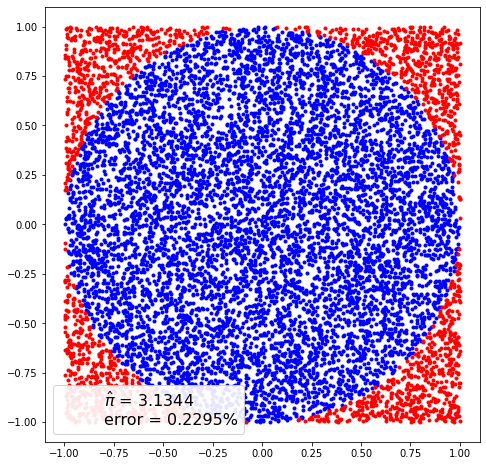

In [23]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de
# radio = 1.

def mc_pi_aprox(N=10000):
    plt.figure(figsize=(8,8))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'b.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\hat \pi$ = {:4.4f}\nerror = {:4.4f}%'
             .format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=16)

mc_pi_aprox()

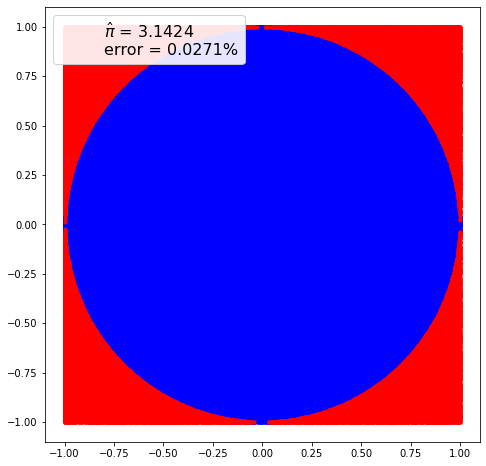

In [25]:
# con 1000000 experimentos
mc_pi_aprox(N=1000000)

# Técnicas de reducción de varianza
Existen varias técnicas generales para la reducción de la varianza, estos métodos mejoran la precisión y la tasa de convergencia de la integración por medio del Método de Monte-Carlo sin aumentar el número de experimentos. Algunas de estas técnicas son:

# Muestreo de importancia:
 La idea principal detrás del Muestreo de importancia es simplemente encontrar una distribución para la variable aleatoria subyacente que asigne una alta probabilidad a aquellos valores que son importantes para calcular la cantidad que nos interesa determinar.

# Muestreo estratificado:
 El principal principio subyacente al Muestreo estratificado es natural: tomar una muestra de una pequeña subpoblación que refleje las propiedades del total de la población tanto como sea posible.
# Variantes de control: 
El método de las Variantes de control explota la información sobre los errores en las estimaciones de las cantidades conocidas para reducir el error de una estimación de una cantidad desconocida.
# Variaciones antitéticas: 
El método de las Variaciones antitéticas es el método de reducción de la varianza, más fácil. Se basa en la idea de combinar una selección aleatoria de puntos con una opción sistemática. Su principal principio es la reducción de la varianza, mediante la introducción de la simetría.

# Métodos de Monte-Carlo via cadenas de Markov
El desarrollo de los métodos de Monte-Carlo via cadenas de Markov, o MCMC por sus siglas en inglés, es sin duda uno de los mayores avances en el enfoque computacional de la estadística. Muchos de los problemas que son intratables utilizando un enfoque analítico a menudo pueden ser resueltos utilizando alguna forma de MCMC, incluso aunque se trate de problemas en varias dimensiones. Las técnicas MCMC se aplican para resolver problemas de integración y optimización en grandes espacios dimensionales. Estos dos tipos de problemas desempeñan un papel fundamental en machine learning, física, estadística, econometría y el análisis de decisiones.

# ¿Qué es una cadena de Markov?
Una cadena de Markov es un objeto matemático que consiste en una secuencia de estados y un conjunto de probabilidades que describen las transiciones entre esos estados. La característica principal que tiene esta cadena es que la probabilidad de moverse a otros estados depende solamente del estado actual. Dada una cadena, se puede realizar una caminata aleatoria eligiendo un punto de partida y moviéndose a otros estados siguiendo las probabilidades de transición. Si de alguna manera encontramos una cadena de Markov con transiciones proporcionales a la distribución que queremos probar, el muestreo se convierte simplemente en una cuestión de moverse entre los estados de esta cadena.
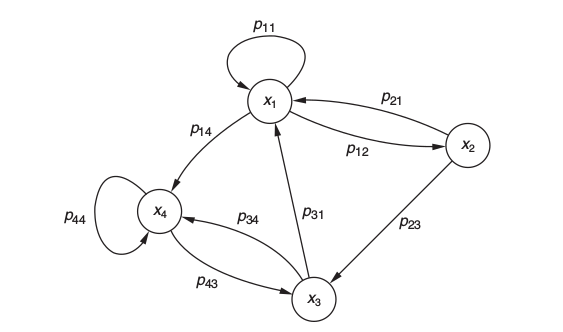

In [27]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x
    
    return muestras

AttributeError: ignored

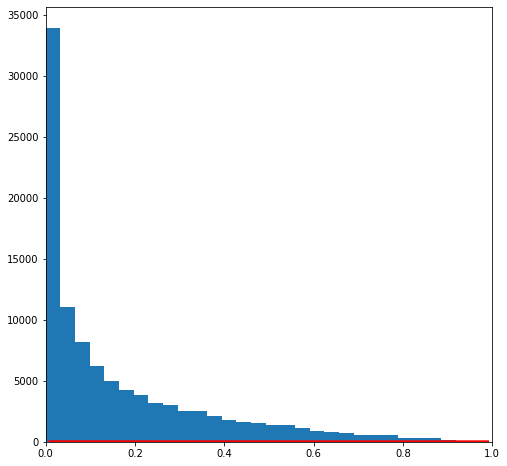

In [28]:
# distribución beta
func = stats.beta(0.4, 2)
samples = metropolis(func=func, steps=100000)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(0, 1)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, normed=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [29]:
:
# distribución normal
func = stats.norm(0.4, 2)
samples = metropolis(func=func)
x = np.linspace(-6, 10, 100)
y = func.pdf(x)
plt.figure(figsize=(8,8))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, normed=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$pdf(x)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

SyntaxError: ignored